# Jupyter Notebook (Python) script for recreating Fig.04

- date: 2024-06-05
- author: Tim Vogel
- group: Photonics and Ultrafast Laser Science (PULS), Ruhr-University Bochum, Germany

In [8]:
import pickle

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [11]:
SMALL_SIZE = 7
MEDIUM_SIZE = 7
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
with open('EOS_dfs.p', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    EOS_dfs = pd.read_pickle(f)
pump_powers = np.arange(40,440,40)

In [4]:
EOS_dfs[40]

average     frequency  \
delay_light                           
0.000000e+00      0.0 -1.163173e+15   
4.298585e-16      0.0 -1.163138e+15   
8.597170e-16      0.0 -1.163102e+15   
1.289575e-15      0.0 -1.163067e+15   
1.719434e-15      0.0 -1.163031e+15   
...               ...           ...   
2.816906e-11      0.0  1.162996e+15   
2.816949e-11      0.0  1.163031e+15   
2.816992e-11      0.0  1.163067e+15   
2.817035e-11      0.0  1.163102e+15   
2.817078e-11      0.0  1.163138e+15   

                                                  signal_fft  
delay_light                                                   
0.000000e+00 -3.052786e-12+0.000000e+                    00j  
4.298585e-16 -1.637563e-12-6.366960e-                    13j  
8.597170e-16  8.449382e-13-1.958807e-                    12j  
1.289575e-15  1.514983e-12-2.318860e-                    12j  
1.719434e-15  1.504079e-13+2.006693e-                    13j  
...                                                      ...  
2.816906e-11 -9.396889e-13-4.144977e-                    12j  
2.816949e-11  1.504079e-13-2.006693e-                    13j  
2.816992e-11  1.514984e-12+2.318860e-                    12j  
2.817035e-11  8.449382e-13+1.958806e-                    12j  
2.817078e-11 -1.637563e-12+6.366960e-                    13j  

[65536 rows x 3 columns]

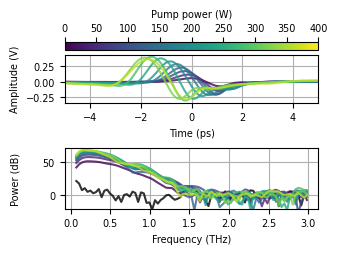

In [12]:
colors = plt.colormaps.get_cmap("viridis")(np.linspace(0, 1, len(EOS_dfs.keys())))
min_THz_frequency=0.05e12
max_THz_frequency = 3e12
select_frequency_dark = (EOS_dfs["dark"]["frequency"] > min_THz_frequency) & (EOS_dfs["dark"]["frequency"] < max_THz_frequency)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8.6/2.54, 6.5/2.54))
ax[1].plot(1e-12 * EOS_dfs["dark"]["frequency"][select_frequency_dark], 
           10 * np.log10(np.abs(EOS_dfs["dark"]["signal_fft"][select_frequency_dark]) ** 2) - np.mean(10 * np.log10(np.abs(EOS_dfs["dark"]["signal_fft"][select_frequency_dark]) ** 2)), 
           color="black", label="Dark", alpha=0.8)
peak_pos = []
for idx, power in enumerate(pump_powers):
    data = EOS_dfs[power]
    if idx==0:
        first_peak_pos = 1e12 * data.index[np.argmax(data["average"])]
    select_frequency = (data["frequency"] > min_THz_frequency) & (data["frequency"] < max_THz_frequency)
    power_spectrum = 10 * np.log10(np.abs(data["signal_fft"][select_frequency]) ** 2) - np.mean(10 * np.log10(np.abs(EOS_dfs["dark"]["signal_fft"][select_frequency_dark]) ** 2))
    im = ax[0].plot(1e12 * data.index - first_peak_pos, data["average"], 
                    color=colors[idx], alpha=0.8, label=EngFormatter("W")(power))
    peak_pos.append(1e12 * data.index[np.argmax(data["average"])])
    ax[1].plot(1e-12 * data["frequency"][select_frequency], power_spectrum, color=colors[idx], alpha=0.8, label=EngFormatter("W")(power))
ax[0].set_xlim([-5, 5])

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="15%", pad=0.05)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, max(pump_powers)), cmap='viridis'), 
             cax=cax, location='top', label="Pump power (W)")

ax[0].set_xlabel("Time (ps)")
ax[0].set_ylabel("Amplitude (V)")
ax[0].grid(True)

ax[1].set_xlabel("Frequency (THz)")
ax[1].set_ylim([-20,70])
ax[1].set_ylabel("Power (dB)")
ax[1].grid(True)

fig.align_ylabels(ax[:])
plt.tight_layout()
plt.savefig("Fig.04_EOSPowerSpectrumShift.png", dpi=600)